In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
from typing import Callable
import math
import numpy as np

In [2]:
def pltfct(fct:Callable[[float],float]=math.sin, xmin:float=-10.0, xmax:float=10.0, step:float=0.1, label:str='function', title:str='', figsize=(10,5)):
    '''
    # Easy Function Plotter
    `fct`:function or list of functions to be plotted
    `xmin`:float lower bound 
    `xmax`:float upper bound
    `step` step size for the plot
    `label`:str or list(str) Legend labels for the function plots
    `title`:str Chart title
    '''
    lines = []
    # create the range
    xr = np.linspace(xmin, xmax, round((xmax-xmin)/step))
    fig, ax = plt.subplots(figsize=figsize)
    ymax = None
    ymin = None
    i = 0
    if isinstance(fct, list):
        if isinstance(label, list):
            if len(label)<len(fct):
                label.extend(['function '+str(i) for i in range(len(label), len(fct))])
        else:
            label = [label+' '+str(i) for i in range(0, len(fct))]
            #print(label)
        for fcti in fct:
            if callable(fcti):
                y = [fcti(x) for x in xr]
                ax.plot(xr, y, label=label[i])
                if ymin==None:
                    ymin = np.min(y)
                else:
                    ymin = min(ymin, np.min(y))
                if ymax==None:
                    ymax = np.max(y)
                else:
                    ymax = max(ymax, np.max(y))
                i += 1
    else:
        if callable(fct):
            y = [fct(x) for x in xr]
            ax.plot(xr, y, label=label)
            ymin = np.min(y)
            ymax = np.max(y)
    #print(lines)
    ax.set_title(title)
    # set the axes cross to 0 if 0 is in the x range
    if (xmin<=0) & (xmax>=0):
        ax.spines['left'].set_position(('data',0))
    else:
        ax.spines['left'].set_position(('axes',0))
    if (ymin<=0) & (ymax>=0):
        ax.spines['bottom'].set_position(('data',0))
    else:
        ax.spines['bottom'].set_position(('axes',0))    

    ax.spines['top'].set_color('none')
    ax.spines['right'].set_color('none')
    plt.legend(loc=1)
    plt.show()


# Testing / Samples

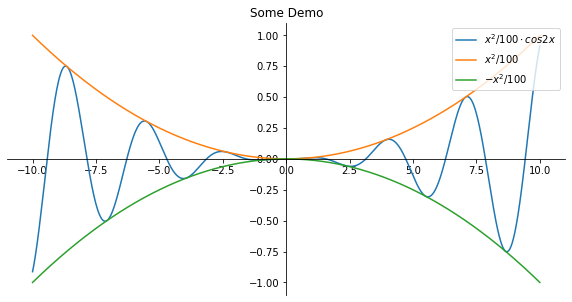

In [3]:
pltfct([lambda x: math.sin(2*x)*x**2/100, 
        lambda x:x**2/100, 
        lambda x:-x**2/100], 
       label=['$x^2/{100} \cdot cos {2x}$',
              '$x^2/100$',
              '$-x^2/100$'], 
       title='Some Demo', step=0.01, xmin=-10)

In [210]:
def sigmoid(x):
    return 1/(1+math.exp(-x))

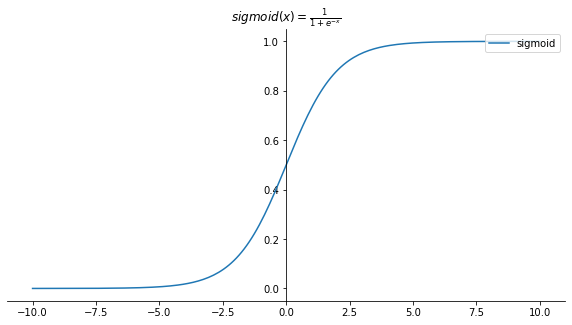

In [211]:
pltfct(sigmoid, label='sigmoid', title='$sigmoid(x)=\\frac{1}{1+e^{-x}}$')

In [212]:
def relu(x):
        return max(0,x)
        

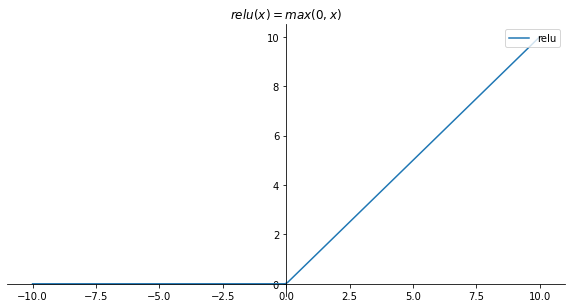

In [205]:
pltfct(relu, label='relu', title='$relu(x)=max(0, x)$')

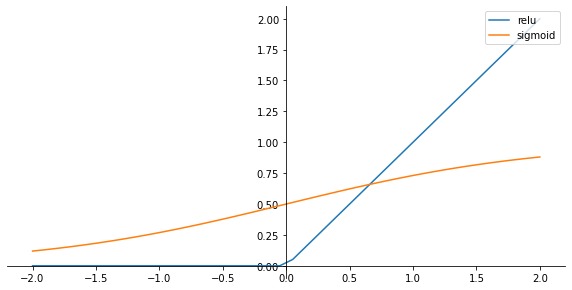

In [213]:
pltfct([relu,sigmoid],label=['relu','sigmoid'], xmin=-2, xmax=2)

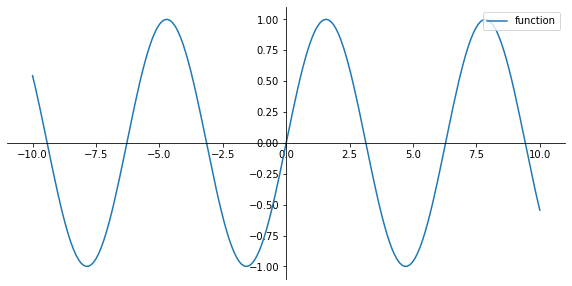

In [4]:
pltfct()